# Importing libraries

In [73]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Defining functions we'll be using

In [74]:
def sales(item_ID):
    URL = 'https://universalis.app/api/history/primal/' + str(item_ID)
    # print(requests.get(URL).json()['entries'])
    sale_df = pd.DataFrame.from_dict(requests.get(URL).json()['entries'])
    return sale_df
def Remove_Outlier_Indices(df): # taken from https://tinyurl.com/5ezpvxd8
    Q1 = df['pricePerUnit'].quantile(0.25)
    Q3 = df['pricePerUnit'].quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df['pricePerUnit'] < (Q1 - 1.5 * IQR)) |(df['pricePerUnit'] > (Q3 + 1.5 * IQR)))
    return trueList

In [75]:
Hi = input("Enter item ID: ")
df = sales(Hi)
df.describe()

,pricePerUnit,quantity,timestamp,worldID
count,1800.000000,1800.0,1.800000e+03,1800.000000
mean,79692.987778,1.0,1.631958e+09,69.611667
std,45488.736536,0.0,7.202278e+05,18.897688
min,20000.000000,1.0,1.630746e+09,35.000000
25%,58594.250000,1.0,1.631338e+09,55.000000
50%,69788.000000,1.0,1.631969e+09,77.000000
75%,87863.250000,1.0,1.632551e+09,93.000000
max,380000.000000,1.0,1.633212e+09,95.000000


In [76]:
df_PPU = Remove_Outlier_Indices(df)
dfSubset = df[df_PPU]
# dfSubset.describe()
dfSubset

,hq,pricePerUnit,quantity,timestamp,worldName,worldID
0,True,51557,1,1633211932,Leviathan,64
1,True,60800,1,1633209510,Lamia,55
2,True,51716,1,1633209394,Leviathan,64
3,True,58861,1,1633209141,Behemoth,78
4,True,58689,1,1633209136,Behemoth,78
...,...,...,...,...,...,...
1795,True,58716,1,1630753562,Exodus,53
1796,True,39998,1,1630752720,Lamia,55
1797,True,54509,1,1630749167,Hyperion,95
1798,True,67000,1,1630748488,Famfrit,35


In [77]:
df.dropna()

,hq,pricePerUnit,quantity,timestamp,worldName,worldID
0,True,51557,1,1633211932,Leviathan,64
1,True,60800,1,1633209510,Lamia,55
2,True,51716,1,1633209394,Leviathan,64
3,True,58861,1,1633209141,Behemoth,78
4,True,58689,1,1633209136,Behemoth,78
...,...,...,...,...,...,...
1795,True,58716,1,1630753562,Exodus,53
1796,True,39998,1,1630752720,Lamia,55
1797,True,54509,1,1630749167,Hyperion,95
1798,True,67000,1,1630748488,Famfrit,35


We can assume each server having their own market. Thus, it's difficult to correlate their data with each other.

<AxesSubplot:>

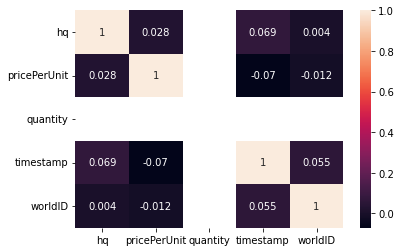

In [78]:
sns.heatmap(df.corr(),annot=True)

# Boxplot of hq and price

<AxesSubplot:xlabel='hq', ylabel='pricePerUnit'>

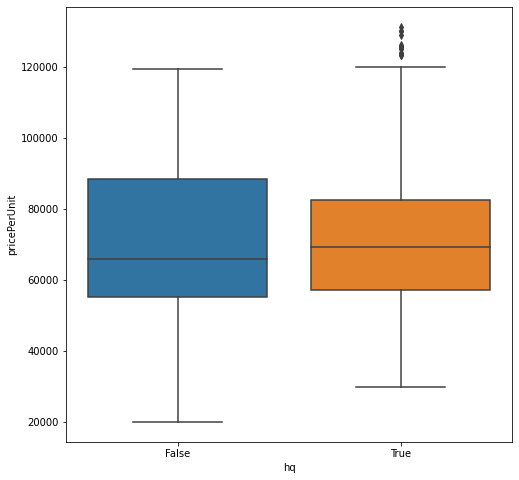

In [85]:
plt.figure(figsize=(8,8))
sns.boxplot(x='hq',y='pricePerUnit',data=dfSubset)
# sns.boxplot(x='hq',y='pricePerUnit',data=df)

## The graph above should give us in-depth view about the difference of prices